**Step 1: Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

**Step 2: Load & Explore Data**

In [2]:
# Load the dataset
df = pd.read_csv('Datasets/Salary_data.csv')

In [3]:
# Initial exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (6704, 7)

First 5 rows:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Title Category
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Engineering & Development
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Data & Analytics
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Management & Leadership
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Sales & Marketing
4,52.0,Male,Master's,Director,20.0,200000.0,Management & Leadership


In [4]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Job Title Category     0
dtype: int64


In [5]:

# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Job Title Category      object
dtype: object


**Step 3: Data Cleaning**

In [6]:
#FIND OUTLINERS
# Calculate IQR (Interquartile Range) for Salary
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

# Identify outliers
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
print(f"\nNumber of outliers detected: {len(outliers)}")

# Display outliers
print("\nOutlier records:")
display(outliers[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']])

Q1 (25th percentile): 70000.00
Q3 (75th percentile): 160000.00
IQR: 90000.00
Lower Bound: -65000.00
Upper Bound: 295000.00

Number of outliers detected: 0

Outlier records:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary


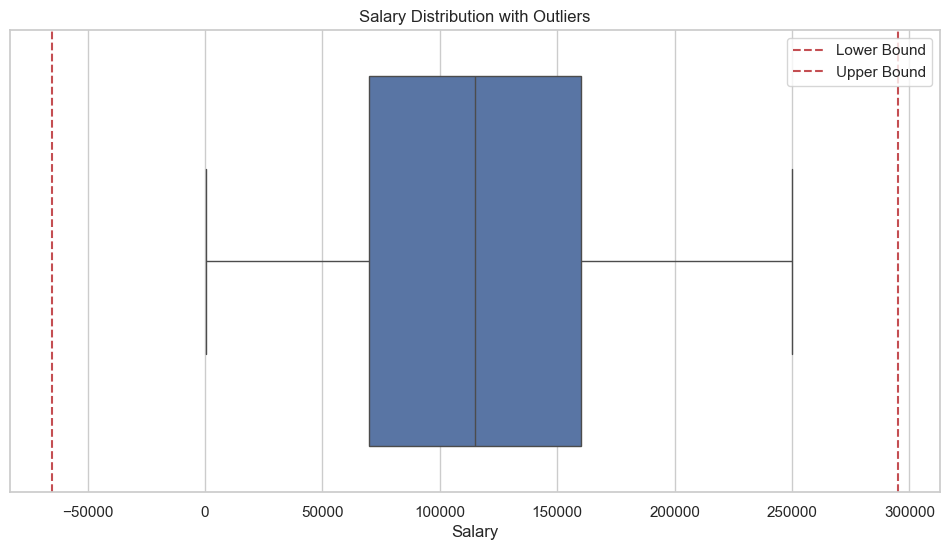

In [7]:
# VISUALIZING OUTLIERS
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Salary'])
plt.title('Salary Distribution with Outliers')
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [8]:
# First check what education levels actually exist in your data
print("Original unique education levels:")
print(df['Education Level'].unique())

Original unique education levels:
["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']


In [9]:
# Enhanced standardization with case insensitivity and more variations
education_mapping = {
    "High School": "HighSchool",
    "Bachelor's": "Bachelor's Degree",
    "Bachelor'S": "Bachelor's Degree",
    "Bachelor's Degree": "Bachelor's Degree",
    "Bachelor'S Degree": "Bachelor's Degree",
    "Master'S Degree": "Master's Degree",
    "Master'S": "Master's Degree",
    "Master's": "Master's Degree",
    "Master's Degree": "Master's Degree",
    "Phd": "PhD",
    "phD": "PhD",
    "PhD": "PhD"
}

# Apply standardization with case insensitivity
df['Education Level'] = df['Education Level'].str.strip().str.title()  # Normalize case first
df['Education Level'] = df['Education Level'].replace(education_mapping)

# Handle any remaining NaN or unexpected values
print("\nUnmapped values after standardization:")
print(df[~df['Education Level'].isin(education_mapping.values())]['Education Level'].unique())

# Verify counts
print("\nStandardized Education Levels:")
print(df['Education Level'].value_counts(dropna=False))

# Convert to categorical
education_order = ["HighSchool", "Bachelor's Degree", "Master's Degree", "PhD"]
df['Education Level'] = pd.Categorical(
    df['Education Level'],
    categories=education_order,
    ordered=True
)


Unmapped values after standardization:
[nan]

Standardized Education Levels:
Education Level
Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
HighSchool            448
NaN                     3
Name: count, dtype: int64


In [10]:
# DATA CLEANING
# Convert categorical variables to proper data types
df['Gender'] = df['Gender'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Job Title Category'] = df['Job Title Category'].astype('category')

# Create experience bins if needed
df['Experience Bins'] = pd.cut(df['Years of Experience'], 
                              bins=[0, 5, 10, 15, 20, 25, 30],
                              labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25+'])

**Step 4: Descriptive Statistics**

In [11]:
# Overall salary statistics
print("Overall Salary Statistics:")
print(df['Salary'].describe())

# Statistics by gender
print("\nSalary by Gender:")
print(df.groupby('Gender')['Salary'].describe())

# Statistics by education level
print("\nSalary by Education Level:")
print(df.groupby('Education Level')['Salary'].describe())

# Statistics by job category
print("\nSalary by Job Title Category:")
print(df.groupby('Job Title Category')['Salary'].describe())

Overall Salary Statistics:
count      6699.000000
mean     115326.964771
std       52786.183911
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64

Salary by Gender:
         count           mean           std      min       25%       50%  \
Gender                                                                     
Female  3013.0  107888.998672  52723.610035    500.0  60000.00  105000.0   
Male    3672.0  121389.870915  52092.726368    350.0  75000.00  120000.0   
Other     14.0  125869.857143  44242.382776  62852.0  77805.75  158610.0   

              75%       max  
Gender                       
Female  150000.00  220000.0  
Male    170000.00  250000.0  
Other   160786.25  166109.0  

Salary by Education Level:
                    count           mean           std      min       25%  \
Education Level                                                             
HighSchool          448.0   

/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_50747/3702356041.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Gender')['Salary'].describe())
/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_50747/3702356041.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Education Level')['Salary'].describe())
/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_50747/3702356041.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

**Step 5:Data Visualization**

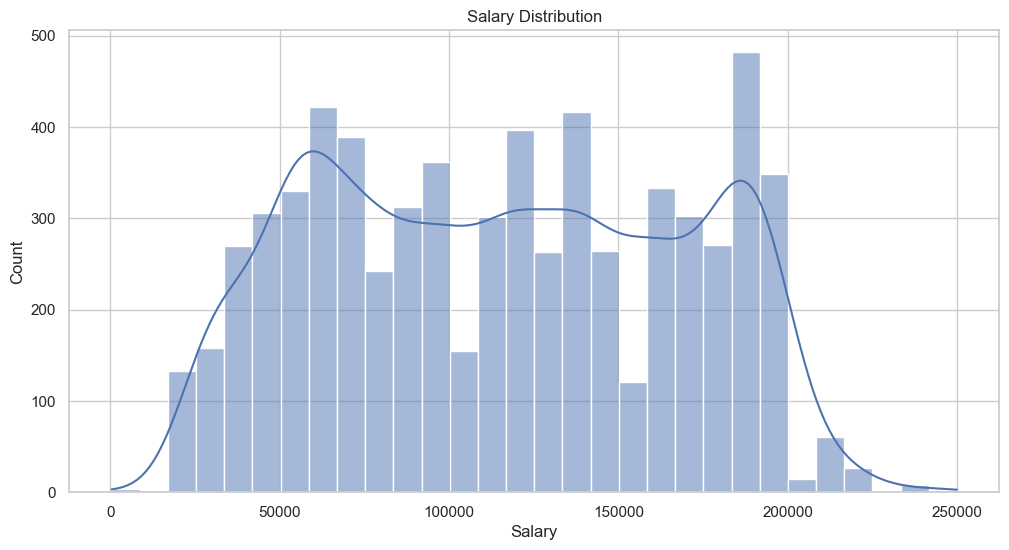

In [12]:
# Salary distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Salary'], kde=True, bins=30)
plt.title('Salary Distribution')
plt.show()

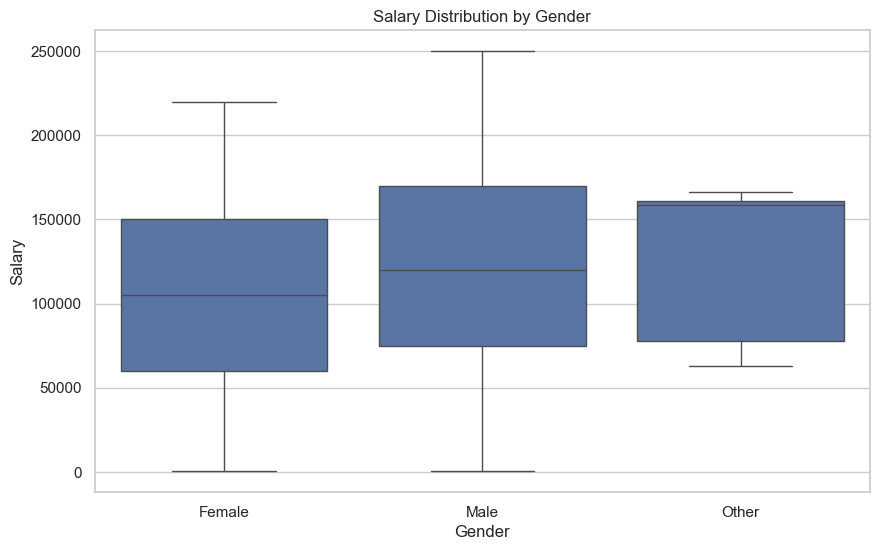

In [13]:
# Salary by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.show()

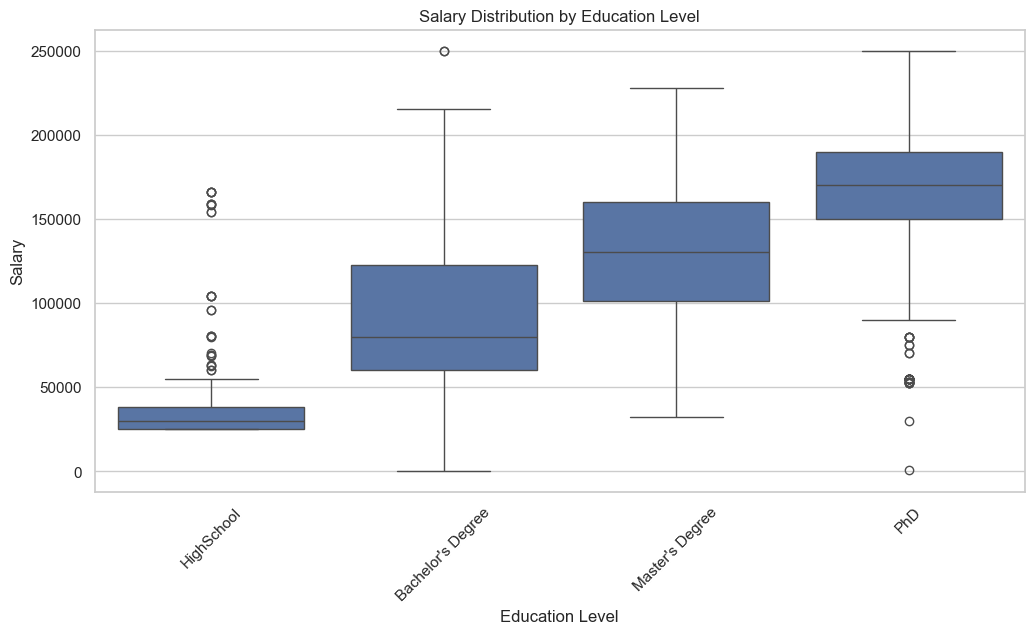

In [14]:
# Salary by education level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

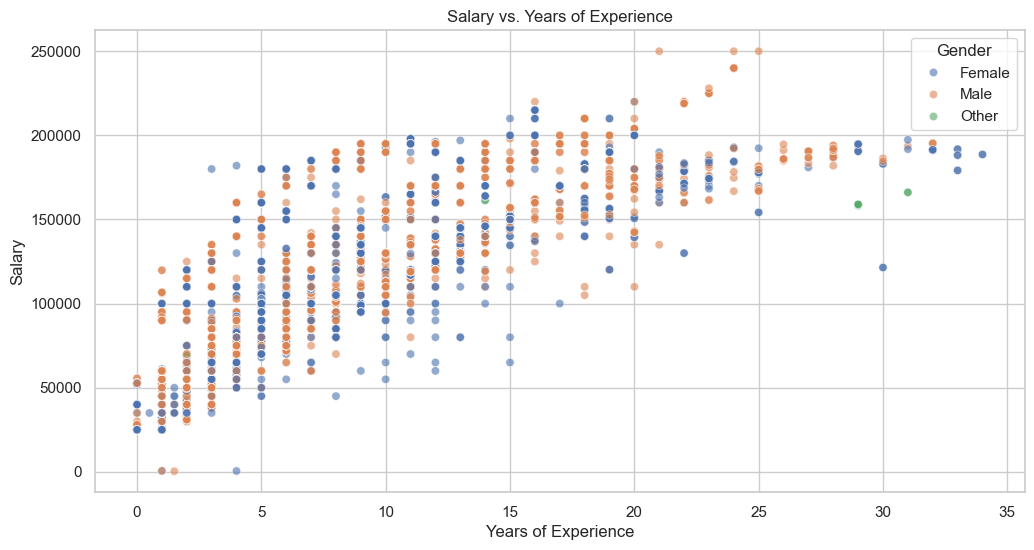

In [15]:
# Salary vs. experience
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df, hue='Gender', alpha=0.6)
plt.title('Salary vs. Years of Experience')
plt.show()

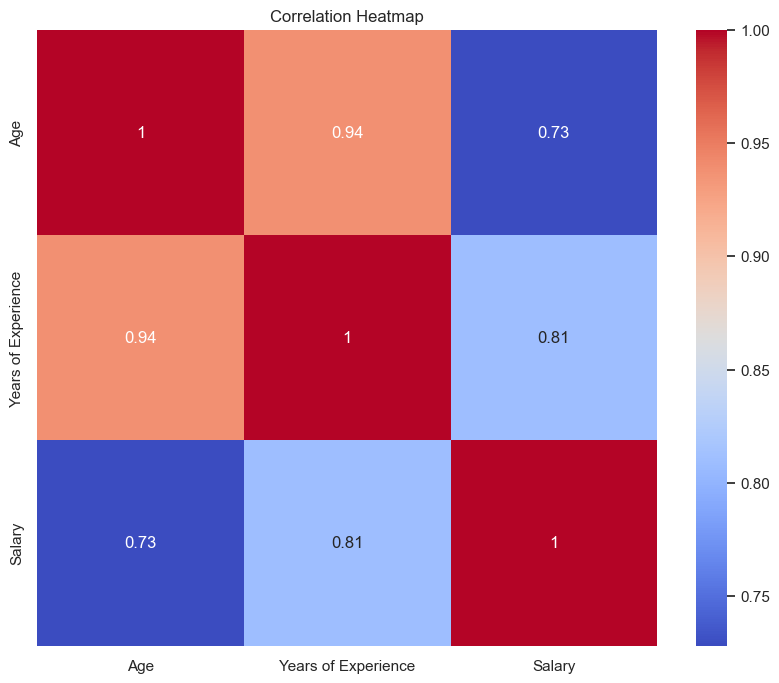

In [16]:
# Heatmap of correlations
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Step 7: Statistic Test**

In [17]:
# Gender pay gap t-test
male_salaries = df[df['Gender'] == 'Male']['Salary']
female_salaries = df[df['Gender'] == 'Female']['Salary']

t_stat, p_value = stats.ttest_ind(male_salaries, female_salaries)
print(f"Gender Pay Gap T-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

Gender Pay Gap T-test: t-statistic = nan, p-value = nan


In [18]:
# ANOVA for education levels
groups = [df[df['Education Level'] == level]['Salary'] 
           for level in df['Education Level'].cat.categories]
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nEducation Level ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")


Education Level ANOVA: F-statistic = nan, p-value = nan
